## Strava\_Get\_Activity\_Maps.ipynb

> scratch notebook to play with the strava api to get some activity info + streams, and plot the routes 

In [1]:
import stravalib
import matplotlib.pyplot as plt
%matplotlib inline

/Users/stephanie/anaconda3/envs/snakes/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [50]:
## in this directory have a file called secrets.txt that has 3 lines
# first line: just the text of your client id (no quotes)
# second : secret (no quotes)
# third: token (no quotes)

In [55]:
f = open('secrets.txt', 'r')
MY_STRAVA_CLIENT_ID = f.readline().strip()
MY_STRAVA_CLIENT_SECRET = f.readline().strip()
STORED_ACCESS_TOKEN = f.readline().strip()
f.close()

In [57]:
from stravalib import Client

client = Client(access_token=STORED_ACCESS_TOKEN)
client.get_athlete() # Get current athlete details

<Athlete id=7656735 firstname=Stephanie lastname=Wuerth>

In [47]:
#jake
#client.get_athlete(1639875)

#can get jake's activities but not his streams
#b = client.get_activity(670741160)

#types = ['time','latlng','distance','altitude','velocity_smooth','grade_smooth']
#streams = client.get_activity_streams(670741160,types=types,resolution='high')

In [49]:
# get my activities -- first 6 of 2016
ids = []
names = []
distances = []
moving_times = []
total_elevation_gains = []
start_dates = []
start_latlngs = []
end_latlngs = []
maps = []
average_speeds = []


for a in client.get_activities(after = "2016-01-01T00:00:00Z",  limit=6):
    ids.append(a.id)
    names.append(a.name)
    distances.append(a.distance)
    moving_times.append(a.moving_time)
    total_elevation_gains.append(a.total_elevation_gain)
    start_dates.append(a.start_date_local)
    start_latlngs.append(a.start_latlng)
    end_latlngs.append(a.end_latlng)
    maps.append(a.map)
    average_speeds.append(a.average_speed)
    #print("{0.name} {0.moving_time}".format(activity))

In [51]:
#now get the stream info for these activities
types = ['time','latlng','distance','altitude','velocity_smooth','grade_smooth']
streamlist = []
for i in range(len(ids)):
    streams = client.get_activity_streams(ids[i],types=types,resolution='high')
    streamlist.append(streams)
   

In [52]:
#convert distances to miles, pull out just the number too
distances_miles = []
for d in distances:
    d = stravalib.unithelper.miles(d).num
    distances_miles.append(d)
distances_miles

[5.3332289429730375,
 14.733456613377873,
 7.159749562554681,
 4.4496391076115485,
 5.805657460431082,
 13.61511274158912]

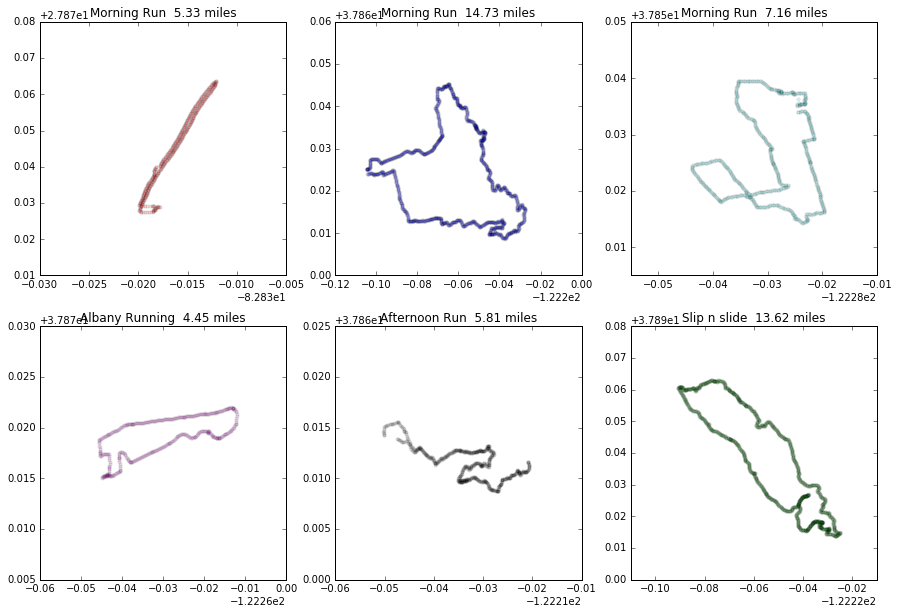

In [53]:
fig, axs = plt.subplots(2,3, figsize=(15, 10), facecolor='w', edgecolor='k')
axs = axs.ravel()
colors = ['r','b','c','m','k','g']
for n in range(len(ids)):
    s = streamlist[n]
    lats = []
    lons = []
    for i in range(len(s['latlng'].data)):
        lats.append(s['latlng'].data[i][0])
        lons.append(s['latlng'].data[i][1])
    axs[n].scatter(lons,lats,10,colors[n],alpha=0.1)
    titlestr = names[n] + '  {0:.2f}'.format(distances_miles[n])+ ' miles'
    axs[n].set_title(titlestr)

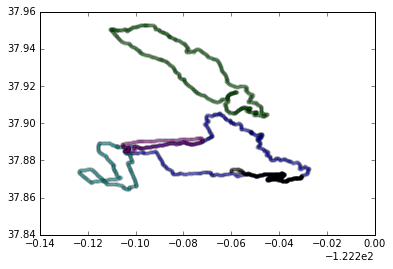

In [54]:
#put them on one map! except for the first one, which is in florida...
colors = ['b','c','m','k','g']
for n in range(len(ids)-1):
    s = streamlist[n+1]
    lats = []
    lons = []
    for i in range(len(s['latlng'].data)):
        lats.append(s['latlng'].data[i][0])
        lons.append(s['latlng'].data[i][1])
    plt.scatter(lons,lats,10,colors[n],alpha=0.1)

## The streams aren't accessible to anyone but the athlete that ran that activity, but the polyline from the activity should be accessible. Below compares the hi-res firetrail to the summary polyline...

In [88]:
m = maps[4]
s = streamlist[4]

In [84]:
m.summary_polyline

'_idfFd|eiV}CTkBcQjOuQf@mBy@mDpHsR}FgV\\a]QiGcBaDpCaFlCtD`BBo@`O`B`Fg@dFtH|GmAaRbAqNxCuDp@uGmFoFUgHwCuH`AcA_@gHmEsA`CY|BjJuApAvCtHL|GlFtEOzG_D`EJbEeBjGl@bTwF_Gj@gF{BuGhAcNuBHuCaE_AlDuAXrBzEM|b@vG|WiIdSlAzDqE`Iu@bL'

In [89]:
import polyline
summary_lat_lon = polyline.decode(m.summary_polyline)
summary_lat_lon

[(37.87424, -122.26003),
 (37.87503, -122.26014),
 (37.87557, -122.25724),
 (37.87295, -122.25425),
 (37.87275, -122.2537),
 (37.87304, -122.25283),
 (37.87151, -122.24969),
 (37.87278, -122.24597),
 (37.87263, -122.24116),
 (37.87272, -122.23983),
 (37.87322, -122.23902),
 (37.87249, -122.23789),
 (37.87178, -122.2388),
 (37.87129, -122.23882),
 (37.87153, -122.24139),
 (37.87104, -122.24252),
 (37.87124, -122.24367),
 (37.86969, -122.2451),
 (37.87008, -122.24205),
 (37.86974, -122.23956),
 (37.86897, -122.23865),
 (37.86872, -122.23726),
 (37.86991, -122.23606),
 (37.87002, -122.23458),
 (37.87078, -122.23303),
 (37.87045, -122.23269),
 (37.87061, -122.23121),
 (37.87164, -122.23079),
 (37.87099, -122.23066),
 (37.87036, -122.23248),
 (37.87079, -122.23289),
 (37.87003, -122.23444),
 (37.86996, -122.23587),
 (37.86877, -122.23694),
 (37.86885, -122.23836),
 (37.86965, -122.23933),
 (37.86959, -122.24031),
 (37.8701, -122.24165),
 (37.86987, -122.24503),
 (37.87111, -122.24375),
 (37

In [91]:
# how does the summary lat lon compare to the hi res from streams?
print 'number of points in hi res activity: ', len(s['latlng'].data)
print 'number of points in polyline summary: ', len(summary_lat_lon)

number of points in hi res activity:  525
number of points in polyline summary:  54


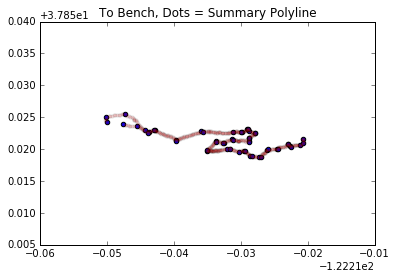

In [93]:
lats = [i[0] for i in summary_lat_lon]
lons = [i[1] for i in summary_lat_lon]
plt.scatter(lons,lats)

lats = []
lons = []
for i in range(len(s['latlng'].data)):
    lats.append(s['latlng'].data[i][0])
    lons.append(s['latlng'].data[i][1])
plt.scatter(lons,lats,10,'r',alpha=0.1)
plt.title('To Bench, Dots = Summary Polyline')